# Exercise 1

In [74]:
import numpy as np
import pandas as pd
import json
from collections import Counter

In [75]:
df = pd.read_csv('data/ted_main.csv')

In [76]:
def string_to_object(string):
    return json.loads(string.replace("'", "\""))

ratings = string_to_object(df.iloc[0]['ratings'])

rating_names = ['Funny', 'Confusing', 'Inspiring']

In [77]:
for col in rating_names:
    df[col] = np.nan

In [78]:
def split_ratings(row):
    ratings = string_to_object(row['ratings'])

    for rating in ratings:
        if rating['name'] in rating_names:
            row[rating['name']] = rating['count']

    return row
        
df = df.apply(lambda x: split_ratings(x), axis=1)

In [79]:
tags_array = []
for arr in df['tags']:
    tags_array += eval(arr)
    
tags = Counter(tags_array).most_common(100)
tag_names = [ tag[0] for tag in tags ]

for name in tag_names:
    df['tag_' + name] = 0

In [80]:
def split_tags(row):
    items = eval(row['tags'])
    for item in items:
        if item in tag_names:
            row['tag_' + item] = 1
    return row

df = df.apply(lambda x: split_tags(x), axis=1)

In [81]:
df = df.drop(columns=['related_talks', 'description', 'event', 'film_date', 'main_speaker', 'name', 'published_date', 'title', 'url', 'speaker_occupation', 'tags', 'ratings', 'comments', 'duration', 'languages', 'num_speaker'])

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [173]:
df.head()

,views,Funny,Confusing,Inspiring,tag_technology,tag_science,tag_global issues,tag_culture,tag_TEDx,tag_design,...,tag_food,tag_religion,tag_peace,tag_ecology,tag_family,tag_demo,tag_poetry,tag_illness,tag_universe,tag_energy
0,47227110,19645,242,24924,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,544,62,413,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,964,27,230,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1697550,59,32,1070,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12005869,1390,72,2893,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [191]:
def train(X_train, y_train):
    reg = LinearRegression()
    reg = reg.fit(X_train, y_train)

    return reg

In [192]:
def test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)


In [196]:
X = df.drop(columns=['views'] + rating_names)
y = df['views']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg = train(X_train, y_train)
print(test(reg, X_test, y_test))

0.10301599471429912


In [197]:
for col in rating_names:
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    reg = train(X_train, y_train)

    print(col)
    print(test(reg, X_test, y_test))
    print("\n")

Funny
0.25498521150346953


Confusing
0.05713619254483271


Inspiring
0.13780922219147185




In [198]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [200]:
def show_features(X_train, X_test, y_train):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)

    cols = fs.get_support(indices=True)

    features = {}
    for i in range(len(fs.scores_)):        
        features[X_train.columns[i]] = fs.scores_[i]

    sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)

    for feature in sorted_features:
        print(feature)

In [201]:
X = df.drop(columns=['views'] + rating_names)
y = df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
show_features(X_train, X_test, y_train)

('tag_psychology', 84.51657944889209)
('tag_brain', 36.641716328932155)
('tag_culture', 21.63992090271225)
('tag_work', 20.416960140631023)
('tag_happiness', 20.03568991958626)
('tag_mental health', 19.504319075099353)
('tag_global issues', 15.000756824164446)
('tag_motivation', 14.834257509971856)
('tag_business', 10.714256921057684)
('tag_technology', 8.912167101324128)
('tag_mind', 8.228250999597549)
('tag_education', 7.779096698825525)
('tag_design', 7.349110194709869)
('tag_politics', 7.13255591678787)
('tag_environment', 6.777379354683841)
('tag_art', 6.77589358958517)
('tag_war', 6.559554570428421)
('tag_humor', 6.389037864475176)
('tag_writing', 6.142302914130293)
('tag_Africa', 6.011534477390562)
('tag_cognitive science', 5.634297468514349)
('tag_health care', 5.405012836654146)
('tag_cities', 4.772724034184309)
('tag_TED Fellows', 4.690865981221687)
('tag_activism', 4.634236117049962)
('tag_collaboration', 4.142211000022953)
('tag_climate change', 4.099602361099049)
('tag_pov

In [203]:
for col in rating_names:
    y = df[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    print(col)
    show_features(X_train, X_test, y_train)
    print("\n")

Funny
('tag_humor', 154.53653495929342)
('tag_entertainment', 30.582662962788593)
('tag_culture', 19.799498951473186)
('tag_psychology', 13.451070784933783)
('tag_children', 13.34849036738309)
('tag_work', 13.09770620778186)
('tag_global issues', 12.842735278204911)
('tag_creativity', 11.986142728602932)
('tag_writing', 9.649264736376546)
('tag_education', 9.585819990721376)
('tag_mind', 9.331068469627066)
('tag_happiness', 8.466571192541966)
('tag_technology', 8.292988890165507)
('tag_motivation', 7.274502389123557)
('tag_mental health', 6.893233306473672)
('tag_brain', 6.829415027756253)
('tag_medicine', 5.6770284853270825)
('tag_future', 5.409593550870383)
('tag_health care', 4.881806517208598)
('tag_environment', 4.310051989114183)
('tag_medical research', 4.208777407723684)
('tag_war', 3.751563642027964)
('tag_activism', 3.4953562123804858)
('tag_nature', 3.4418300629949123)
('tag_TED Fellows', 3.4118098000741988)
('tag_design', 3.1780935853547794)
('tag_cities', 2.852721292304624

For views, the strongest predicting tags is psychology, with brain as distant second, followed by culture, work, happiness, mental_health, global_issues, motivation, and business.

For rating Funny, the strongest predicting tag is overwhelmingly humor, then entertainment as a distant second, followed by culture, psychology, children, work, global_issues, and creativity.

For rating Confusing, the strongest predicting tag is culture, followed by psychology, then brain, the philosophy, evolution, physics, happiness, after a drop off math, innovation, nature, and health.

# Exercise 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("../week3/data/hasy-data-labels.csv")

In [4]:
df = df.loc[(df['symbol_id'] >= 70) & (df['symbol_id'] <= 80)]
import matplotlib.pyplot as plt

imglist = []

for file in df["path"]:
    img = plt.imread("../week3/data/" + file)[:,:,0].flatten()
    imglist.append(img)
    
df["img"] = imglist
df = df.sample(frac=1).reset_index(drop=True)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['img'].values, df['symbol_id'].values, test_size=0.2)

In [6]:
rfc = RandomForestClassifier()
rfc = rfc.fit(np.stack(X_train), np.stack(y_train))

In [7]:

def get_acc(model, X_test, y_test):
    y_pred = model.predict(np.stack(X_test))
    success = 0

    for i in range(0, len(y_pred)):
        if (y_test[i] == y_pred[i]):

            success += 1

    return success / len(y_test) * 100

In [8]:
acc = get_acc(rfc, X_test, y_test)

In [9]:
print(f"Success is at {acc} without tuning.")

Success is at 84.31372549019608 without tuning.


In [10]:
import matplotlib.pylab as plt
X_train, X_test, y_train, y_test = train_test_split(df['img'].values, df['symbol_id'].values, test_size=0.2)

In [11]:

def show_accs(params, X_train, X_test, y_train, y_test):
    accs = {}
    for i in params:
        rfc = RandomForestClassifier(n_estimators=i)
        rfc = rfc.fit(np.stack(X_train), np.stack(y_train))

        accs[i] = get_acc(rfc, X_test, y_test)

        lists = sorted(accs.items())
        x, y = zip(*lists)

    plt.plot(x, y)
    plt.show()


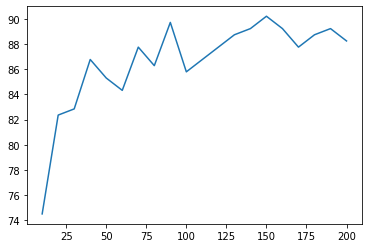

In [12]:
show_accs(range(10, 210, 10), X_train, X_test, y_train, y_test)


Accuracy seems to generally rise sharply towards around 75 trees, then vary somewhat randomly, going up and down when the quantity of trees is increased.

Tuning hyperparameters according to test data would not work in this case due to test data being a small and fixed sample. The data should be resplit and run multiple times for each parameter.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['img'].values, df['symbol_id'].values, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

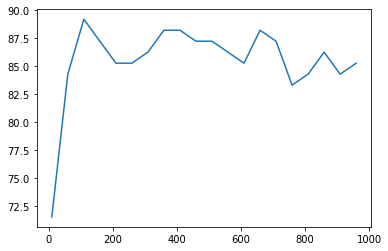

In [14]:
show_accs(range(10, 1000, 50), X_train, X_val, y_train, y_val)

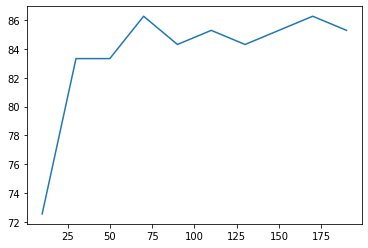

In [15]:
show_accs(range(10, 200, 20), X_train, X_val, y_train, y_val)

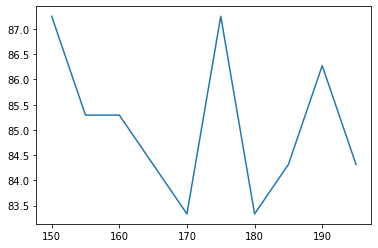

In [16]:
show_accs(range(150, 200, 5), X_train, X_val, y_train, y_val)

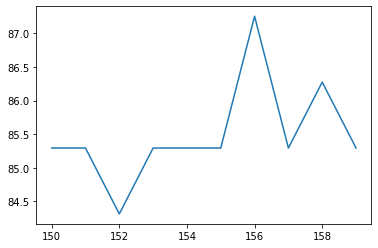

In [17]:
show_accs(range(150, 160, 1), X_train, X_val, y_train, y_val)

In [18]:
rfc = RandomForestClassifier(n_estimators=157)
rfc = rfc.fit(np.stack(X_train), np.stack(y_train))

get_acc(rfc, X_test, y_test)

86.27450980392157

Marginally better than the untuned model, but then again this is not a very good way to optimize hyperparameters.

In [19]:
from tpot import TPOTClassifier

In [20]:
tc = TPOTClassifier(generations=5, population_size=10, verbosity=2)

In [23]:
X = np.stack(df['img'].values)
y = np.stack(df['symbol_id'].values)

tc.fit(X, y)


Generation 1 - Current best internal CV score: 0.8666666666666666
Generation 2 - Current best internal CV score: 0.8892156862745099
Generation 3 - Current best internal CV score: 0.8892156862745099
Generation 4 - Current best internal CV score: 0.8892156862745099
Generation 5 - Current best internal CV score: 0.8892156862745099
Best pipeline: MLPClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10), alpha=0.01, learning_rate_init=0.001)


TPOTClassifier(generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x7f9724017280>,
               population_size=10, verbosity=2)

Best pipeline: MLPClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10), alpha=0.01, learning_rate_init=0.001)
CV score: 0.8892156862745099